In [8]:
import pandas as pd
import torch

In [9]:
df = pd.read_csv('거문도.csv', encoding='cp949')
df

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,22103,2013-01-01,6.8,1020.6,61.0,6.2,13.9,2.1,1.4,2.1,3.2,5.5,7.1
1,22103,2013-01-02,9.6,1026.8,58.0,4.2,13.8,2.3,1.5,2.0,3.0,4.5,6.4
2,22103,2013-01-03,NaN,1034.6,59.0,-1.6,13.1,NaN,NaN,1.9,2.8,NaN,4.9
3,22103,2013-01-04,5.2,1029.4,47.0,-0.4,11.8,1.5,0.9,1.5,2.4,4.3,5.8
4,22103,2013-01-05,7.3,1024.8,54.0,1.5,11.3,1.4,1.0,1.5,2.2,3.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,22103,2022-12-27,8.4,1027.4,60.0,6.0,12.3,1.3,0.9,1.2,1.7,3.6,4.0
3644,22103,2022-12-28,8.8,1029.6,61.0,6.1,12.9,1.3,0.9,1.0,1.6,3.4,3.7
3645,22103,2022-12-29,8.1,1032.0,61.0,5.4,16.5,1.1,0.8,1.1,1.8,3.4,3.7
3646,22103,2022-12-30,7.4,1031.7,55.0,6.5,17.8,1.1,0.7,0.9,1.6,3.3,3.5


In [10]:
df = df.rename(columns={'일시': 'date', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)', '평균 최대 파고(m)':'wave(m)','평균 풍속(m/s)':'Wind(m/s)','평균기압(hPa)':'Apress(hPa)','평균 상대습도(%)':'Moisture(%)'})
df=df.set_index(pd.to_datetime(df.date)) # Date를 인덱스로
df=df[['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)']] # Column 재정리
df

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
date,,,,,,
2013-01-01,6.8,1020.6,61.0,6.2,13.9,2.1
2013-01-02,9.6,1026.8,58.0,4.2,13.8,2.3
2013-01-03,NaN,1034.6,59.0,-1.6,13.1,NaN
2013-01-04,5.2,1029.4,47.0,-0.4,11.8,1.5
2013-01-05,7.3,1024.8,54.0,1.5,11.3,1.4
...,...,...,...,...,...,...
2022-12-27,8.4,1027.4,60.0,6.0,12.3,1.3
2022-12-28,8.8,1029.6,61.0,6.1,12.9,1.3
2022-12-29,8.1,1032.0,61.0,5.4,16.5,1.1


In [11]:
df.dropna(subset=['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)'], inplace=True)
df

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
date,,,,,,
2013-01-01,6.8,1020.6,61.0,6.2,13.9,2.1
2013-01-02,9.6,1026.8,58.0,4.2,13.8,2.3
2013-01-04,5.2,1029.4,47.0,-0.4,11.8,1.5
2013-01-05,7.3,1024.8,54.0,1.5,11.3,1.4
2013-01-06,6.0,1024.1,54.0,2.7,12.3,1.4
...,...,...,...,...,...,...
2022-12-27,8.4,1027.4,60.0,6.0,12.3,1.3
2022-12-28,8.8,1029.6,61.0,6.1,12.9,1.3
2022-12-29,8.1,1032.0,61.0,5.4,16.5,1.1


In [12]:
correlation_matrix = df[['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)']].corr()
correlation_matrix

,Wind(m/s),Apress(hPa),Moisture(%),Atemp(°C),Stemp(°C),wave(m)
Wind(m/s),1.000000,0.190010,-0.339334,-0.377484,-0.222054,0.711163
Apress(hPa),0.190010,1.000000,-0.728718,-0.712152,-0.558933,-0.216362
Moisture(%),-0.339334,-0.728718,1.000000,0.672655,0.461129,0.081072
Atemp(°C),-0.377484,-0.712152,0.672655,1.000000,0.890513,0.012899
Stemp(°C),-0.222054,-0.558933,0.461129,0.890513,1.000000,0.047779
wave(m),0.711163,-0.216362,0.081072,0.012899,0.047779,1.000000


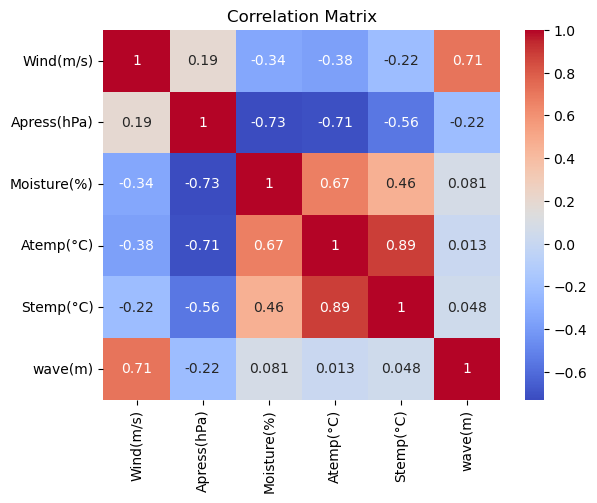

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Wind(m/s)','Apress(hPa)','Moisture(%)','Atemp(°C)','Stemp(°C)','wave(m)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
monthly_avg_temp = df['Stemp(°C)'].resample('M').mean()
monthly_avg_temp

date
2013-01-31    11.600000
2013-02-28    12.259259
2013-03-31    12.062963
2013-04-30    12.863333
2013-05-31    15.093103
                ...    
2022-08-31    25.764516
2022-09-30    24.383333
2022-10-31    21.022581
2022-11-30    17.496667
2022-12-31    15.680645
Freq: M, Name: Stemp(°C), Length: 120, dtype: float64

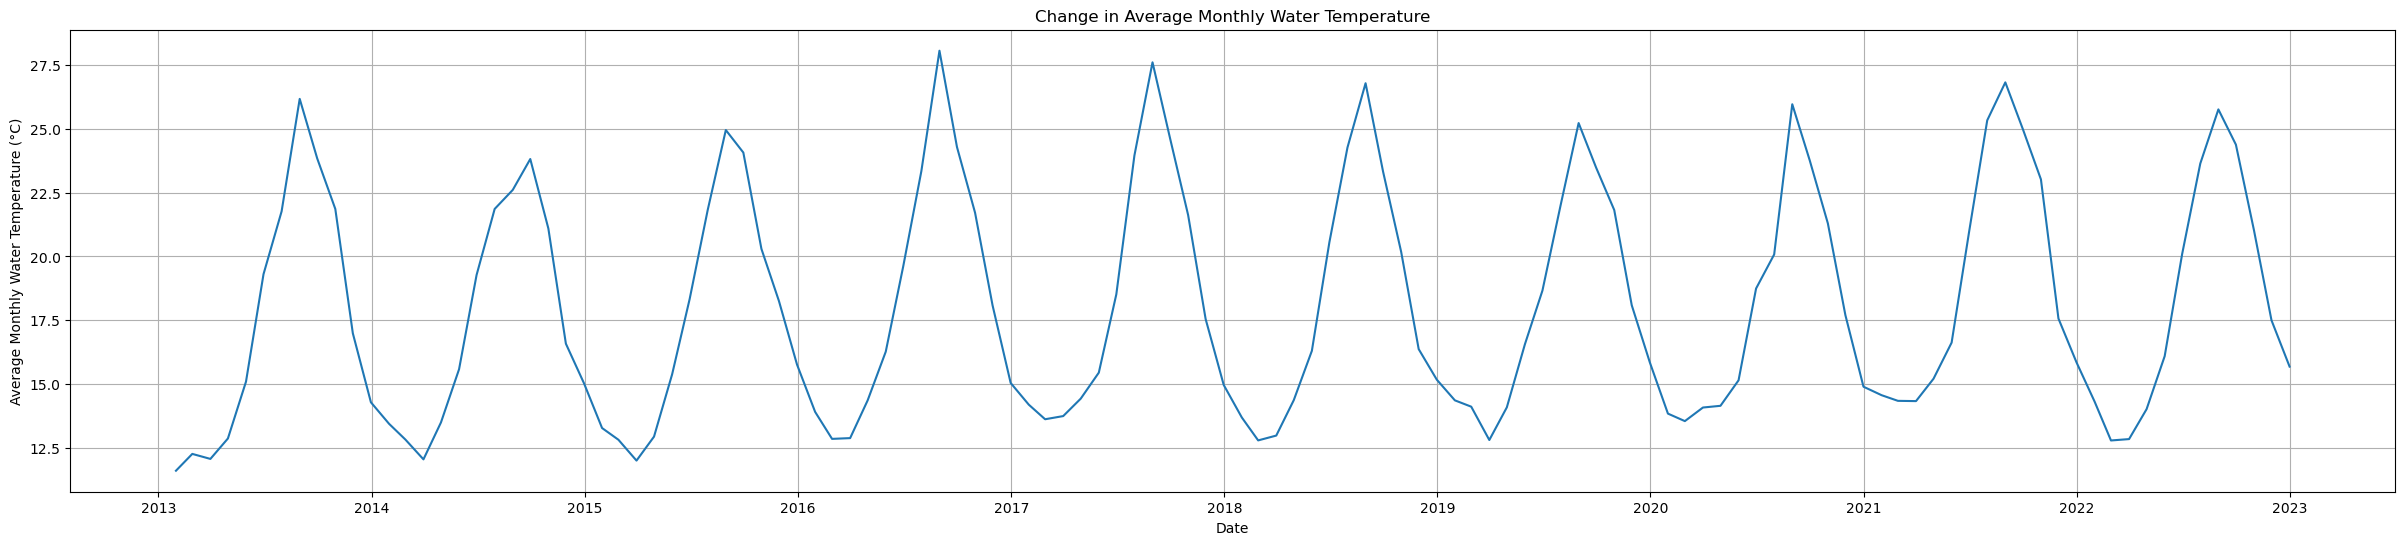

In [15]:
plt.figure(figsize=(30, 6))
plt.plot(monthly_avg_temp)
plt.xlabel('Date')
plt.ylabel('Average Monthly Water Temperature (°C)')
plt.title('Change in Average Monthly Water Temperature')
plt.grid(True)
plt.show()

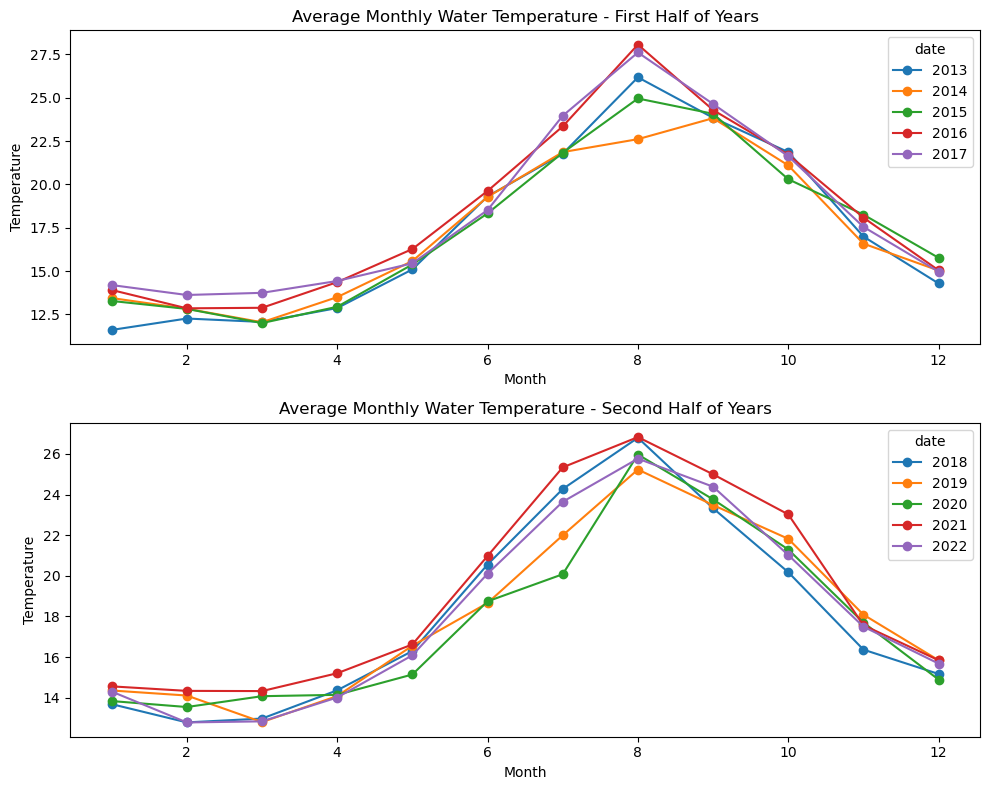

In [16]:
import matplotlib.pyplot as plt

# Group by year and month, and calculate the average temperature
yearly_monthly_avg = df.groupby([df.index.year, df.index.month])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and months as rows
yearly_monthly_avg = yearly_monthly_avg.unstack(level=0)

# Calculate the total number of years
num_years = yearly_monthly_avg.shape[1]

# Calculate the midpoint to divide the years into two groups
midpoint = num_years // 2

# Split the years into two groups
first_half_years = yearly_monthly_avg.iloc[:, :midpoint]
second_half_years = yearly_monthly_avg.iloc[:, midpoint:]

# Create two separate plots for the two groups of years
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the first half of the years
first_half_years.plot(marker='o', linestyle='-', ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Temperature')
axes[0].set_title('Average Monthly Water Temperature - First Half of Years')

# Plot the second half of the years
second_half_years.plot(marker='o', linestyle='-', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Average Monthly Water Temperature - Second Half of Years')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


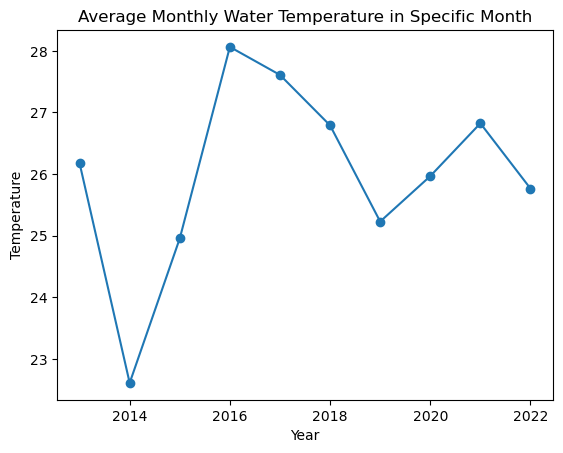

In [17]:
# Define the specific month you want to plot
target_month = 8  # August

# Filter the data for the specific month
specific_month_data = df[df.index.month == target_month]

# Group by year and calculate the average temperature
yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()

# Plot the average monthly water temperature for the specific month
yearly_avg_specific_month.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Monthly Water Temperature in Specific Month')
plt.show()

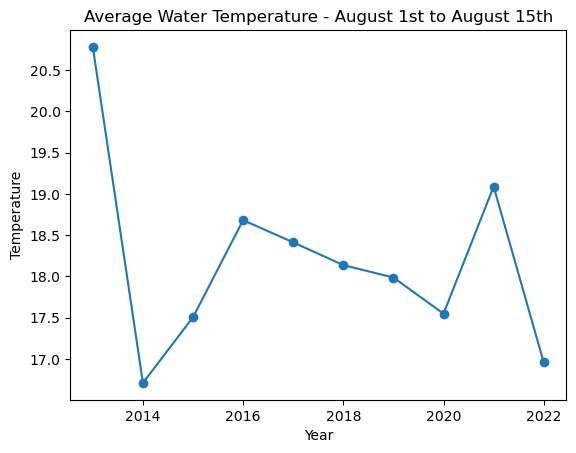

In [18]:

# Define the start and end dates for the range (August 1st to August 15th)
start_date = '2013-08-01'
end_date = '2022-08-15'

# Filter the data for the specified date range
date_range_data = df[(df.index >= start_date) & (df.index <= end_date)]

# Group by year and calculate the average temperature
yearly_avg_temp = date_range_data.groupby(date_range_data.index.year)['Stemp(°C)'].mean()

# Plot the average water temperature for the specified date range
yearly_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature - August 1st to August 15th')
plt.show()

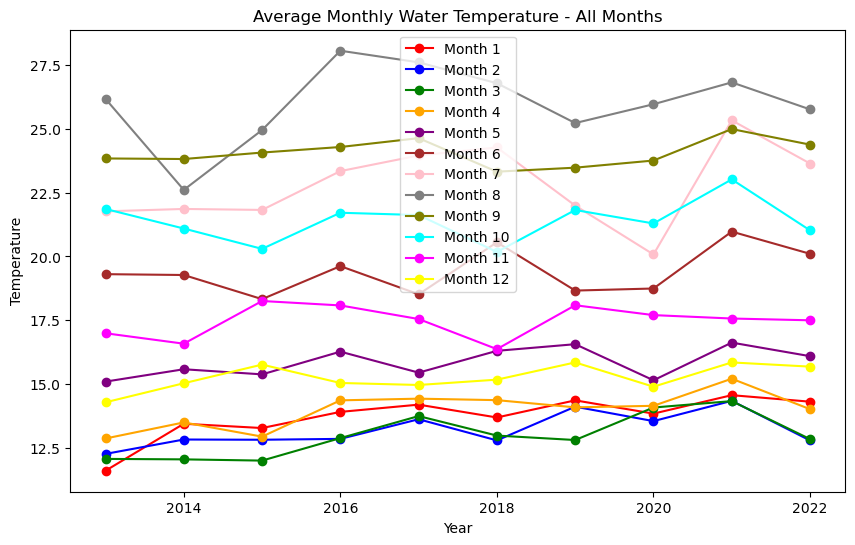

In [19]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


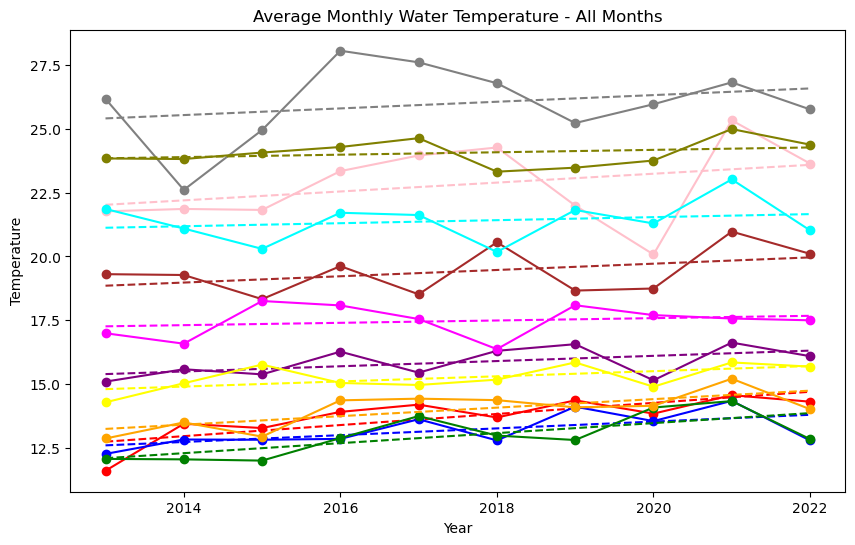

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the linear regression line
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='--')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Display the plot
plt.show()


Order of trends by prominence:
1. Month 1 - Slope: 0.21744002876372162
2. Month 3 - Slope: 0.1963280530288315
3. Month 7 - Slope: 0.17399276412624567
4. Month 4 - Slope: 0.1666881922675025
5. Month 2 - Slope: 0.13310415638001838
6. Month 8 - Slope: 0.13050441327304488
7. Month 6 - Slope: 0.12325143865648752
8. Month 5 - Slope: 0.1021752414766873
9. Month 12 - Slope: 0.10055369361820987
10. Month 10 - Slope: 0.05936841820019201
11. Month 9 - Slope: 0.04721560431905232
12. Month 11 - Slope: 0.04575757575757586


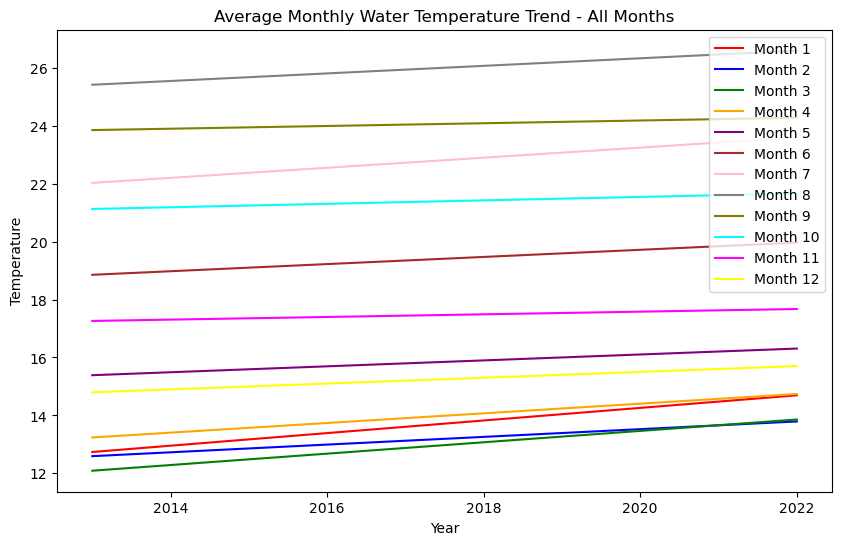

In [21]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store the slopes
slopes = {}

# Loop through each month and plot the average monthly water temperature trend
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the average monthly water temperature trend with a different color
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='-', label=f'Month {month}')
    
    # Calculate the slope of the trend line
    slope = reg.coef_[0][0]
    slopes[month] = slope

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (month, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. Month {month} - Slope: {slope}")

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature Trend - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


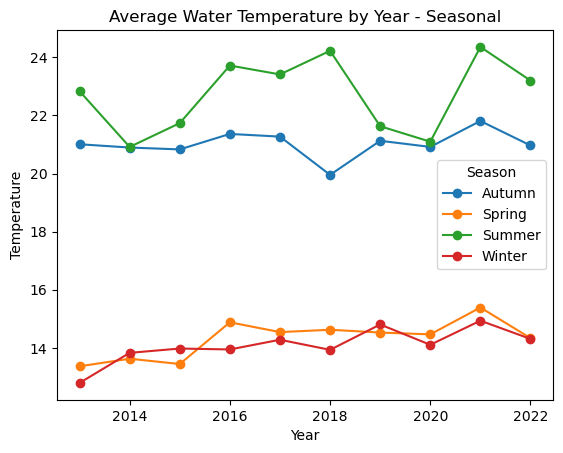

In [22]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')
plt.show()

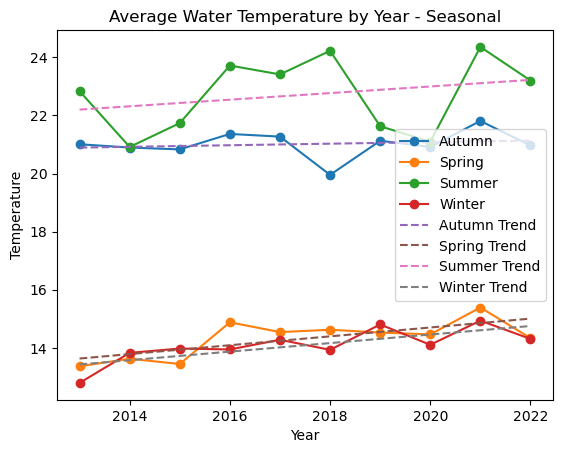

In [23]:

# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')

# Add trend lines for each season
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')

plt.legend()
plt.show()


Order of trends by prominence:
1. Spring - Slope: 0.1527484680284428
2. Winter - Slope: 0.14711505220577886
3. Summer - Slope: 0.1136624274634294
4. Autumn - Slope: 0.02690518651120745


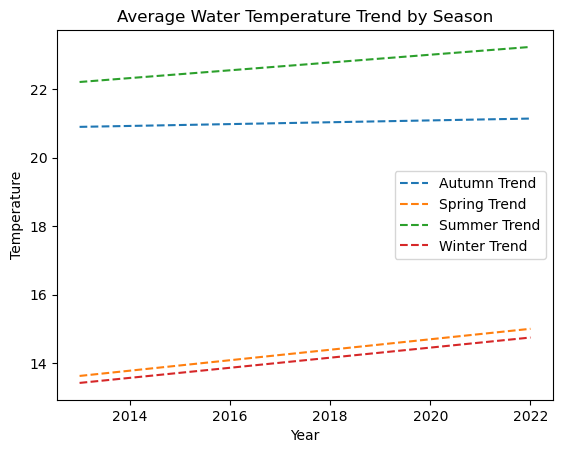

In [24]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Initialize a dictionary to store the slopes
slopes = {}

# Plot the trend lines for each season and calculate the slopes
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')
    slopes[season] = model.coef_[0]

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (season, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. {season} - Slope: {slope}")

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature Trend by Season')
plt.legend()
plt.show()
